# Python Exercises
###### By Kian Mohadjerin

## Chapter 8 Project - Wine Quality
##### Question: Process the data to find out what contributes to good wine.

### Import the necessary libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


### Read the CSV file and show a sample

In [115]:
df=pd.read_csv('winequality-red.csv')
#to select a random sample of rows (or columns) from your DataFrame.
df.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
661,7.5,0.42,0.31,1.6,0.08,15.0,42.0,0.9978,3.31,0.64,9.0,5


#### Show information about the data

In [116]:
#quickly view the first few rows of your dataset.
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [117]:
#Show information about the data 
# to obtain the dimensions of an array or a DataFrame
df.shape

(1599, 12)

In [118]:

# for generating descriptive statistics of the data in the DataFrame.
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data processing

In [119]:
#Rename the column labels
df = df.rename(columns={  'fixed acidity': 'FA', 'volatile acidity': 'VA', 'citric acid': 'CA', 'residual sugar': 'RS', 'chlorides': 'Cl', 'free sulfur dioxide': 'FSD', 'total sulfur dioxide': 'TSD',
    'density': 'D', 'pH': 'pH', 'sulphates': 'SO4', 'alcohol': 'OH', 'quality': 'score'
})
df.head(4)

,FA,VA,CA,RS,Cl,FSD,TSD,D,pH,SO4,OH,score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [120]:
#Check for NaN and Null values:
print(df.isna().sum())

FA       0
VA       0
CA       0
RS       0
Cl       0
FSD      0
TSD      0
D        0
pH       0
SO4      0
OH       0
score    0
dtype: int64


### Data visualization and analysis

In [121]:
df.isnull().sum()


FA       0
VA       0
CA       0
RS       0
Cl       0
FSD      0
TSD      0
D        0
pH       0
SO4      0
OH       0
score    0
dtype: int64

In [122]:
#Define train_test_split_manual function
# This function manually splits a dataset into training and testing sets.
# It takes a DataFrame and a test percentage (default 30%),
# then returns x_train, y_train, x_test, and y_test without shuffling the data.


def train_test_split_manual(data, test_pct=30):
    test_size = round(data.shape[0] * test_pct / 100)  # convert percentage to decimal
    x_test = data.iloc[:test_size, :11]     # first rows for testing, first 11 columns (features)
    y_test = data.iloc[:test_size, 11:]     # first rows for testing, target column(s)
    x_train = data.iloc[test_size:, :11]    # remaining rows for training, first 11 columns
    y_train = data.iloc[test_size:, 11:]    # remaining rows for training, target column(s)
    return x_train, y_train, x_test, y_test




In [123]:
x_train, y_train, x_test, y_test = train_test_split_manual(df)
print(x_test.head(2))


    FA    VA   CA   RS     Cl   FSD   TSD       D    pH   SO4   OH
0  7.4  0.70  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4
1  7.8  0.88  0.0  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8


In [124]:
#Define normalization function
# All data scaled to 0 to 1 normalized
def normalize(series):
     # Calculate the maximum value of the series
    mx = series.max() #
    # Calculate the minimum value of the series
    mn = series.min() #

    # Handle the case where the range (max - min) is zero.
    # This happens if all values in the series are identical.
    # If mx and mn are equal, (mx - mn) would be zero, leading to division by zero.
    if (mx - mn) == 0:
        return series.astype(float) # Return the series converted to float, preserving values

    # Create a NEW Series with a 'float' data type BEFORE assigning the normalized values.
    # This is the crucial step to prevent the "incompatible dtype" FutureWarning.
    normalized_series = series.astype(float)

    # Iterate through the original series and calculate the normalized values,
    # assigning them to the new 'float' series.
    for i, val in enumerate(series):
        normalized_series.iloc[i] = (val - mn) / (mx - mn) #

    # Return the newly created, normalized, and float-type series
    return normalized_series


In [125]:
#Apply normalization to the DataFrame
df = df.copy()
df = df.apply(normalize)
df.head()

,FA,VA,CA,RS,Cl,FSD,TSD,D,pH,SO4,OH,score
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [126]:
#proving this DataFrame is normalized.
df.describe()

,FA,VA,CA,RS,Cl,FSD,TSD,D,pH,SO4,OH,score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
#Split the data
x_train,y_train,x_test,y_test = train_test_split_manual(df)

In [128]:
#Data visualization and analysis
# Let's check the correlation
corr=df.corr()

<Axes: >

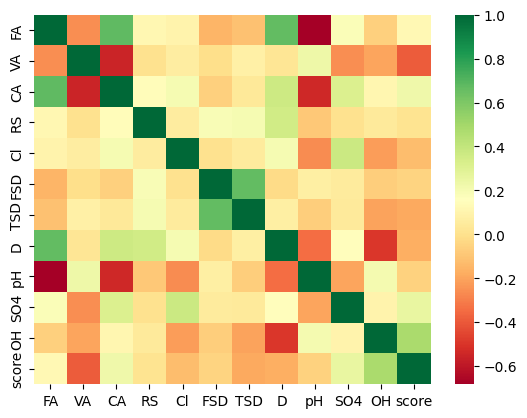

In [129]:
#Use sns.heatmap to visualize the correlation matrix of features.
# This helps quickly identify highly correlated (positive or negative) variables


#The correlation matrix shows that there is some (minimum of |0.5| and maximum of |0.68|) correlation
#between CA&FA, D&FA, pH&FA, CA&VA, pH&CA
#The only feature that correlates, even slightly, to the score is the alcohol content of the wine. Either
#way, the correlations are far from strong.
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap="RdYlGn")

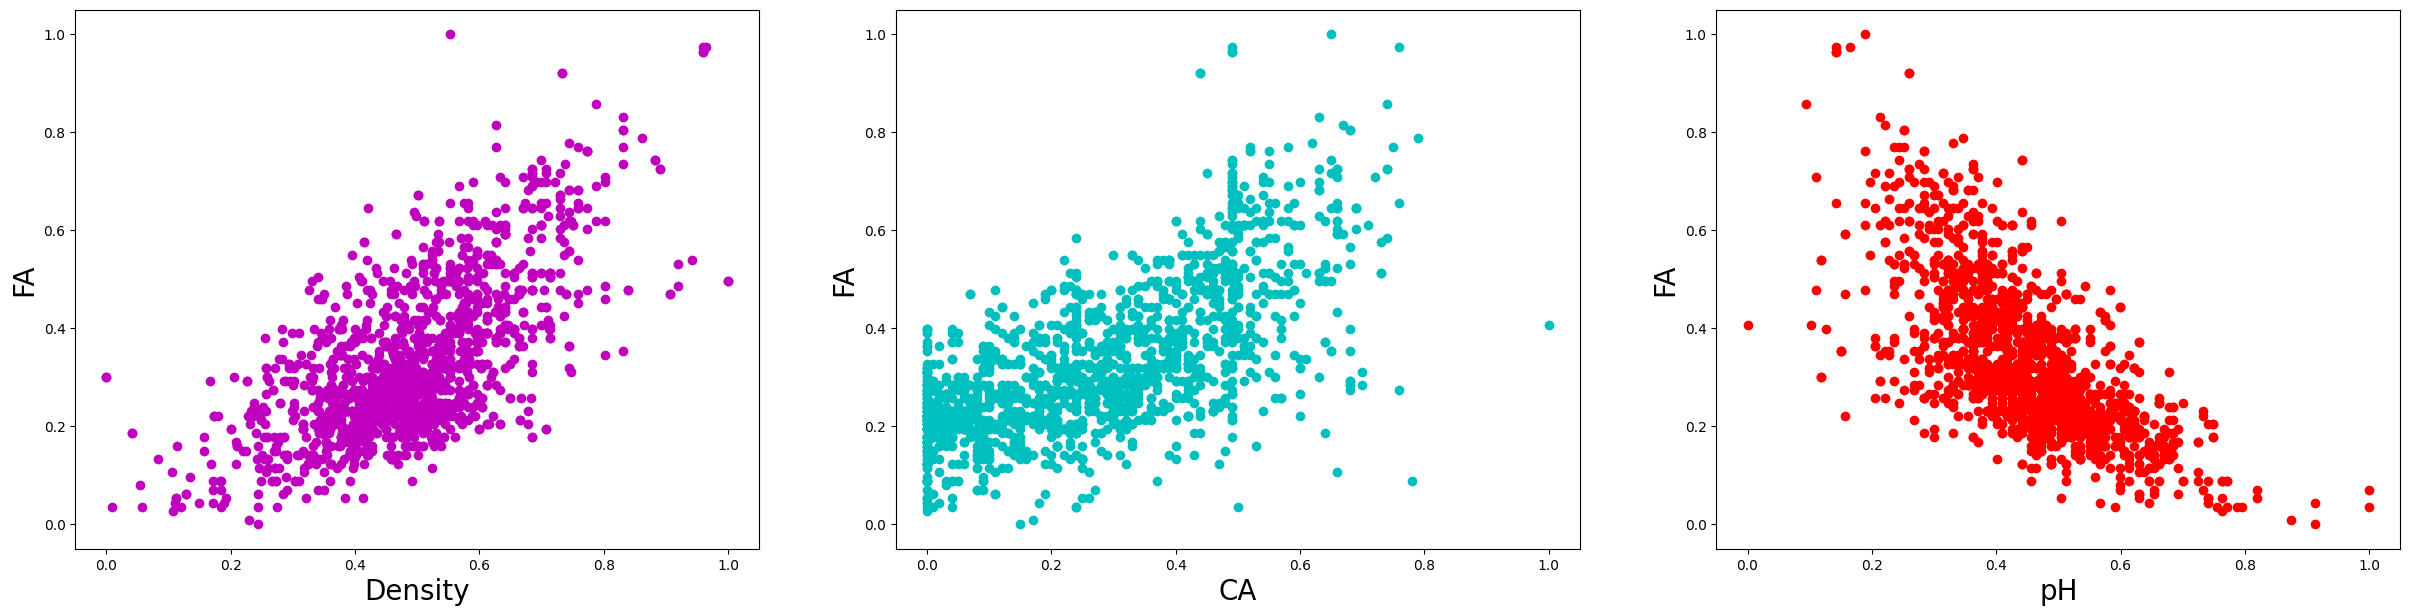

In [130]:
fig=plt.figure(figsize=(30, 7))
plt.subplot(1,3,1)
plt.plot(df['D'], df['FA'], 'mo')
plt.xlabel('Density', fontsize=20)
plt.ylabel('FA', fontsize=20)
plt.subplot(1,3,2)
plt.plot(df['CA'], df['FA'], 'co')
plt.xlabel('CA', fontsize=20)

plt.ylabel('FA', fontsize=20)
plt.subplot(1,3,3)
plt.plot(df['pH'], df['FA'], 'ro')
plt.xlabel('pH', fontsize=20)
plt.ylabel('FA', fontsize=20)
plt.show()


In [131]:
#Boxplot of the features
df.describe()

,FA,VA,CA,RS,Cl,FSD,TSD,D,pH,SO4,OH,score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
#Based on the data, FSD and TSD are the only parameters showing a significantly high spread of data.

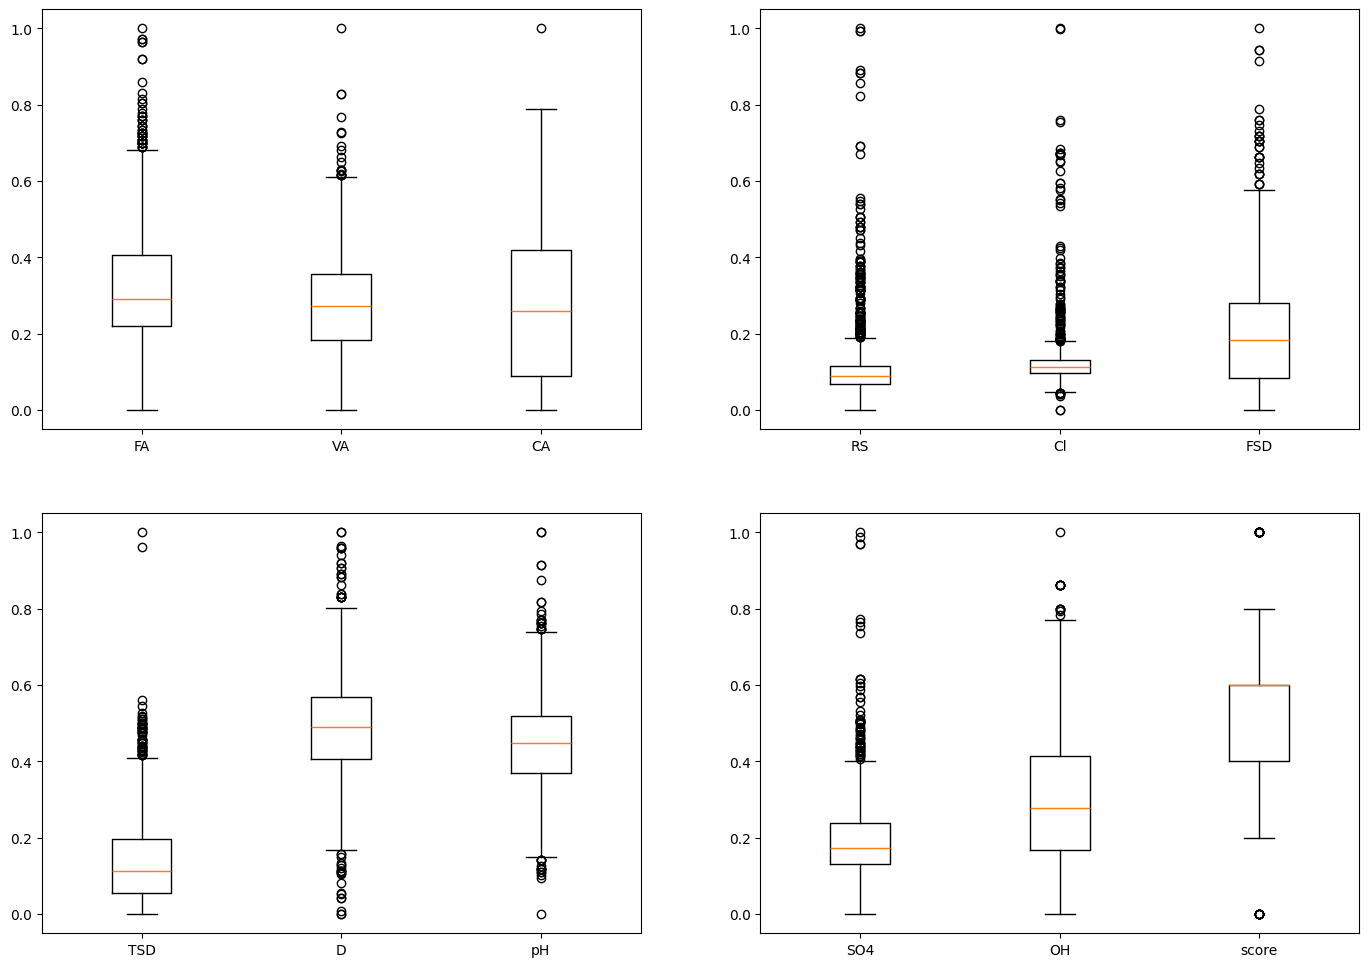

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(17, 12))
axs[0,0].boxplot(df.iloc[:,0:3], tick_labels=df.iloc[:,:3].columns,)
axs[0,1].boxplot(df.iloc[:,3:6], tick_labels=df.iloc[:,3:6].columns)
axs[1,0].boxplot(df.iloc[:,6:9], tick_labels=df.iloc[:,6:9].columns)
axs[1,1].boxplot(df.iloc[:,9:12],tick_labels=df.iloc[:,9:12].columns)
plt.show()

In [134]:
#High density features are very noticable and a high count of outliers for all the features except CA and OH.


<Figure size 1200x600 with 0 Axes>

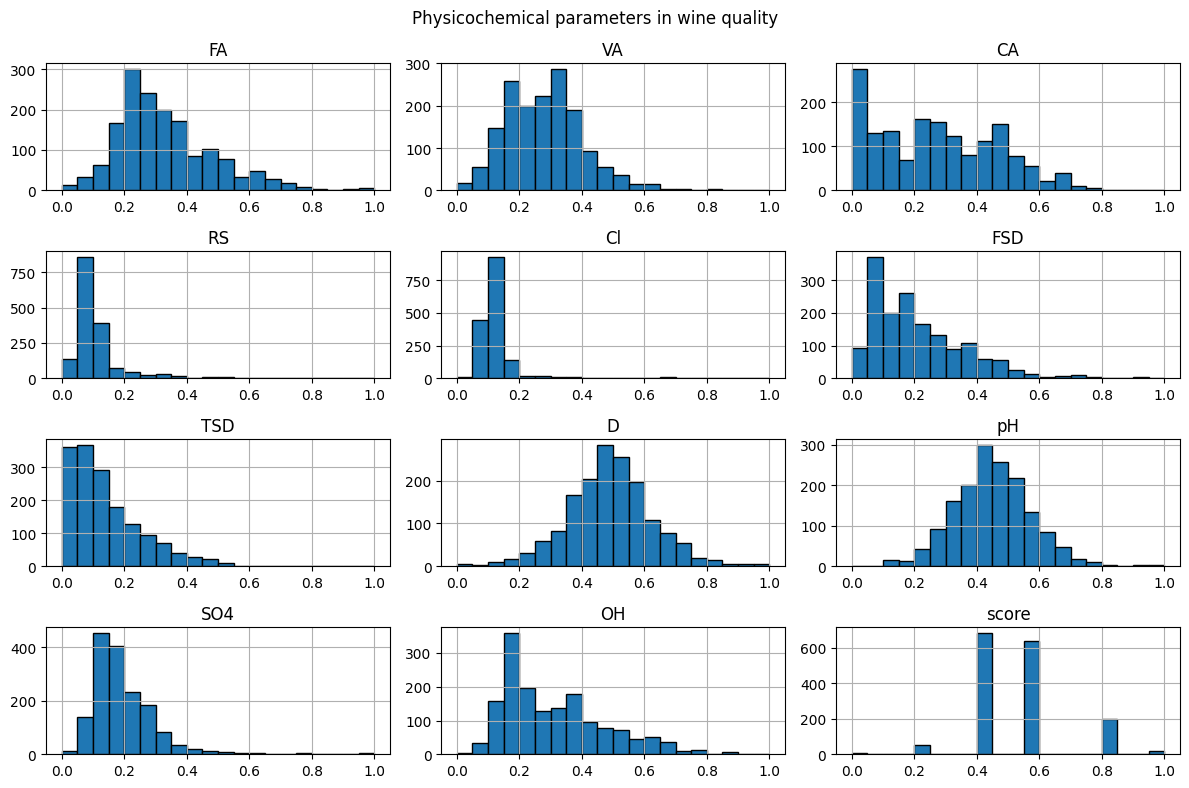

In [135]:
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 8),edgecolor='black')
plt.suptitle('Physicochemical parameters in wine quality')
plt.tight_layout()
plt.show()


In [ ]:
#Conclusion
#The density and pH are close to being (standard) normally distributed.
#The histograms show that FA, VA, CA, RS, Cl, FSD, TSD, SO4, OH are skewed to the left. This
#means that these features tend to be high values.
#The only features with right-sided (or low value) outliers are the normally distributed features: D
and pH.
#It would be difficult to draw meaningful conclusions and patterns from this data to give a direct
#answer to what makes a wine excellent. The data scientist should have enough information to
#choose a learning algorithm.

### Conclusion

Twelve physicochemical parameters were analyzed: fixed acidity 0
volatile acidity, citric acid, residual sugar chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol and quality.

The histograms allow individual visualization of the behavior of the samples for each parameter analyzed

No duplicates, null or empty values are visible in the data list.

The highest quality of wine has a value of 8, and in general for this quality citric acid and density are values close to 1.

81.8% of samples have an average quality, 13.5% a high quality and 4.6% a low quality.